<a href="https://colab.research.google.com/github/xthimylJ/daily-practice/blob/main/pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.8.0+cu126
torchvision version: 0.23.0+cu126


In [2]:
# set up training and test data
train_data = datasets.FashionMNIST(

    root="data",
    train = True,
    download= True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 4.56MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 67.3MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 22.8MB/s]


In [3]:
# see first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
# what's the shape of the image?
image.shape

torch.Size([1, 28, 28])

In [5]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


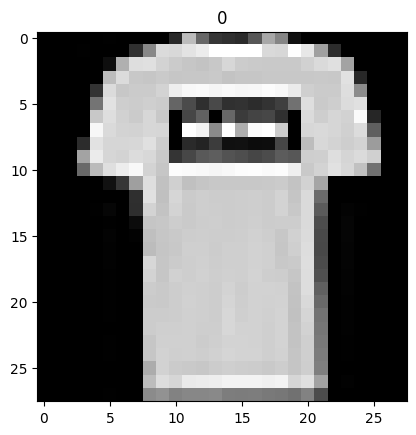

In [6]:
# visualizing data
image, item = train_data[1]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(item)
plt.show()

In [7]:
# prepare data loader
from torch.utils.data import DataLoader

# set up batch size
BATCH_SIZE = 32
train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [9]:
from torch.nn.modules.pooling import MaxPool2d
from torch.nn.modules.conv import Conv2d
# building model class

class Model(nn.Module):
    def __init__(self, in_channels: int, num_kernels: int, num_classes:int):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=num_kernels,
                      kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_kernels, out_channels=num_kernels,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=num_kernels, out_channels=num_kernels,
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(num_kernels, num_kernels, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten()

        )


In [11]:
# let's simulate an image
torch.manual_seed(67)
ims = torch.randn(size=(32, 3, 64, 64))
single_im = ims[0]

In [12]:
single_im

tensor([[[-1.0390, -0.4298,  1.5251,  ...,  0.2531, -0.7321,  0.8683],
         [ 1.0003,  0.9451, -0.4444,  ..., -0.5642,  1.1278, -0.1120],
         [-0.1713,  0.3672,  0.2926,  ..., -1.0712, -0.7089,  0.1219],
         ...,
         [ 1.3515, -0.8106, -1.0373,  ..., -1.8308, -0.2564, -1.3358],
         [ 0.5334, -1.5775, -1.0026,  ...,  0.9909, -0.9383, -0.0564],
         [ 1.3804,  1.6963, -0.8366,  ..., -0.5896, -0.4239,  0.5474]],

        [[-0.7424, -1.8342,  0.7664,  ..., -0.4292,  1.2102,  2.0286],
         [-0.9743, -0.3558, -0.4349,  ...,  1.2493, -0.7460, -0.4511],
         [-0.6673, -1.0916,  1.0894,  ..., -1.6091,  0.2464,  1.0197],
         ...,
         [ 0.1128, -1.2200,  0.0147,  ...,  0.4687,  0.2372, -0.8921],
         [-0.6231,  1.5959, -0.6827,  ...,  0.5619,  0.0682, -0.7802],
         [ 0.7348, -0.6653, -2.6057,  ...,  0.6399,  0.1963, -0.3861]],

        [[ 0.7340,  1.6606, -1.0199,  ...,  0.1618,  1.5866, -0.6990],
         [ 2.2278,  0.2638,  0.4290,  ...,  0

In [8]:
# breaking down nn.Conv2d()
conv_layer = nn.Conv2d(in_channels=3, out_channels=10,kernel_size=3,padding=1,stride=1)
conv_layer

Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [14]:
single_im = single_im.unsqueeze(0)
single_im.shape

torch.Size([1, 3, 64, 64])

In [15]:
conv_layer(single_im)

tensor([[[[-2.9019e-01,  2.9763e-03, -1.8256e-01,  ..., -1.1153e-01,
            2.5510e-01, -9.8065e-02],
          [ 5.0323e-01, -6.3504e-02, -2.2982e-01,  ..., -6.9110e-02,
           -7.4009e-02,  2.3541e-01],
          [-2.3332e-01,  5.2655e-02,  2.9733e-01,  ...,  1.5852e-02,
            2.0991e-01,  3.0470e-01],
          ...,
          [-1.0051e-03,  4.8633e-01, -2.9355e-01,  ...,  4.8155e-01,
            3.7153e-01, -9.3680e-01],
          [-1.5293e-01,  2.1362e-01, -1.4585e+00,  ...,  1.8323e-01,
           -3.2565e-01, -1.7721e-01],
          [ 1.6932e-01,  3.9680e-02,  3.8994e-01,  ..., -2.8846e-02,
           -4.6924e-02,  2.4039e-02]],

         [[-4.0762e-01, -3.8307e-01, -7.1594e-01,  ..., -3.3648e-01,
            5.9600e-01,  1.7065e-01],
          [-3.4349e-01,  7.3682e-01, -9.4062e-02,  ...,  1.1831e+00,
            1.1453e-01, -2.0340e-01],
          [-5.7745e-01, -3.8971e-01,  2.0469e-01,  ..., -4.6597e-01,
           -7.5133e-01,  6.7439e-01],
          ...,
     